Importando librerias

In [335]:
import matplotlib.pyplot as plt
import pymysql
import pandas as pd
import seaborn as sns
from  matplotlib.ticker import PercentFormatter

Crear la conexion a la base de datos, obtener toda tabla ingresos y crear un diccionario con la información de la tabla

In [298]:
try:    
    
    connection = pymysql.connect(
        host='localhost',
        database='telefonica',
        user='root',
        password='98020927'
    )
    cursor = connection.cursor()

    cursor.execute("select anio, trimestre, ingresos_miles from ingresos;")
    dictionary_result = [dict((cursor.description[i][0], value) for i, value in enumerate(row)) for row in cursor.fetchall()]    
    #df_ingresos =pd. DataFrame(cursor.fetchall());
    connection.close()
except mysql.connector.Error as e:
    print('Error al conectar a MySQL:', e)

Crear el dataframe df_ingresos

In [299]:
df_ingresos = pd.DataFrame.from_dict(dictionary_result)

Ver la descripcion de la tabla, identificando outliers, se identifico que en el año estaba como 2033, cuando era 2023 y quedo corregido en BDD

In [300]:
df_ingresos.describe()


,anio,trimestre,ingresos_miles
count,42.000000,42.000000,4.200000e+01
mean,2018.761905,2.452381,5.001648e+07
std,3.074756,1.130560,8.710208e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.250000,7.055326e+06
50%,2019.000000,2.000000,2.047527e+07
75%,2021.000000,3.000000,4.485090e+07
max,2024.000000,4.000000,4.420322e+08


Eliminemos duplicdos si los hay

In [301]:
df_ingresos = df_ingresos.drop_duplicates()

Observemos como se correlacionan el año, trimestre e ingresos

<Axes: >

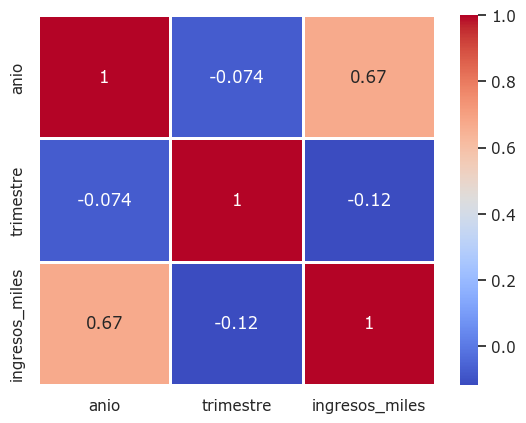

In [302]:
df_ingresos_cor=df_ingresos.corr()
sns.heatmap(df_ingresos_cor,annot=True,cmap='coolwarm',linewidths=1)

De acuerdo a la gráfica anterior, podemos observar que el año esta relacionado con los ingresos miles, grafiquemos estos elementos

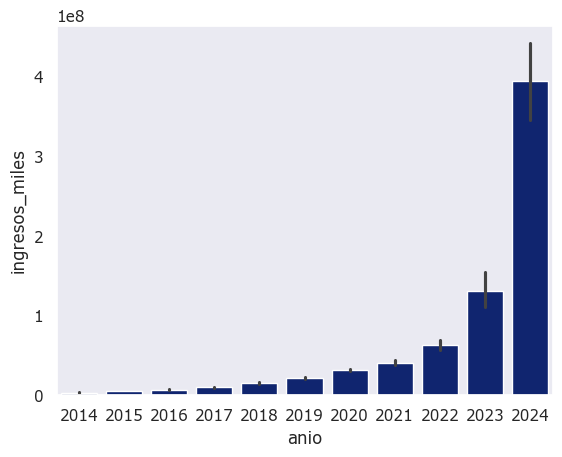

In [303]:
sns.barplot(x=df_ingresos.anio, y=df_ingresos.ingresos_miles)  # Crea y muestra el gráfico de barras
plt.show()

Observamos que conforme avanza con el año, podemos ver que sus ingresos van subiendo, lo cual se ve bien, ahora veamos como se comporta por trimestre

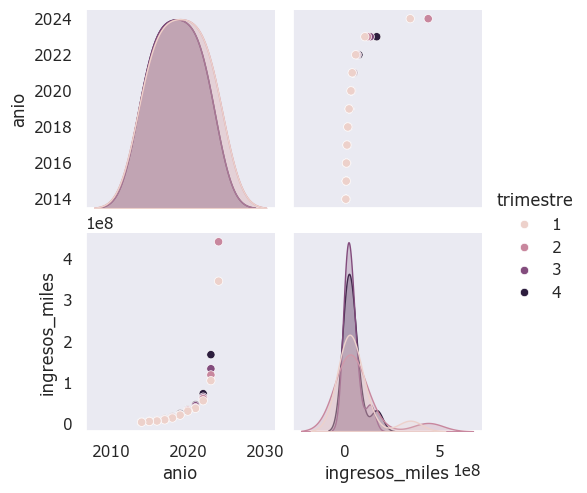

In [304]:
sns.pairplot(data=df_ingresos, hue="trimestre")

De acuerdo a las gráficas anteriores, el primer trimestre es el que crece más lento a compración de los ultimos trimestres, observemos como se comporta la penetración total. Obtengamos la información desde BDD

In [305]:
try:    
    
    connection = pymysql.connect(
        host='localhost',
        database='telefonica',
        user='root',
        password='98020927'
    )
    cursor = connection.cursor()

    cursor.execute("select anio, trimestre, acceso_100_hogares, acceso_100_hab from penetracion_total;")
    dictionary_result = [dict((cursor.description[i][0], value) for i, value in enumerate(row)) for row in cursor.fetchall()]        
    df_penetracion_total = pd.DataFrame.from_dict(dictionary_result)    
    connection.close()
except mysql.connector.Error as e:
    print('Error al conectar a MySQL:', e)

Observando si algun dato esta fuera de rango

In [306]:
df_penetracion_total.describe()

,anio,trimestre,acceso_100_hogares,acceso_100_hab
count,42.000000,42.000000,42.000000,42.000000
mean,2018.761905,2.452381,63.202143,19.574048
std,3.074756,1.130560,9.950772,3.269282
min,2014.000000,1.000000,49.550000,15.050000
25%,2016.000000,1.250000,53.782500,16.515000
50%,2019.000000,2.000000,62.670000,19.395000
75%,2021.000000,3.000000,72.530000,22.602500
max,2024.000000,4.000000,78.890000,24.790000


Eliminemos duplicados

In [307]:
df_penetracion_total = df_penetracion_total.drop_duplicates()

veamos la correlacion, de los elementos

<Axes: >

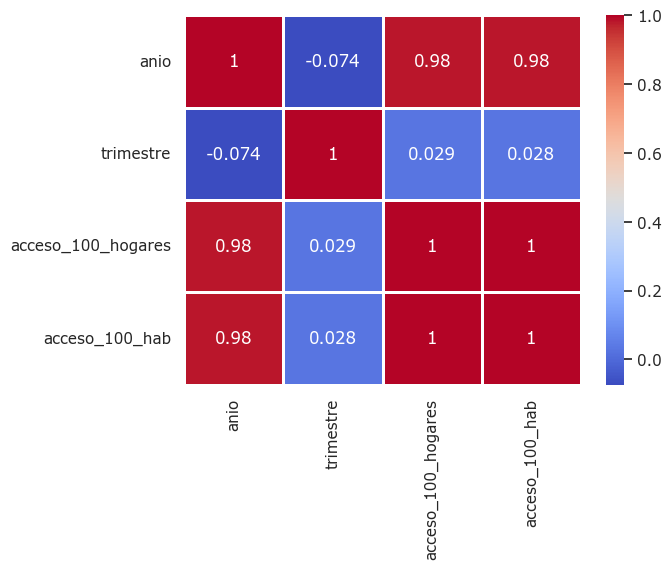

In [308]:
df_penetracion_total_cor=df_penetracion_total.corr()
sns.heatmap(df_penetracion_total_cor,annot=True,cmap='coolwarm',linewidths=1)

De acuerdo a la gráfica anterior, el año esta muy relacionado con los acceso de horares y de habitantes, identintifiquemos que encontramos, con estas columnas

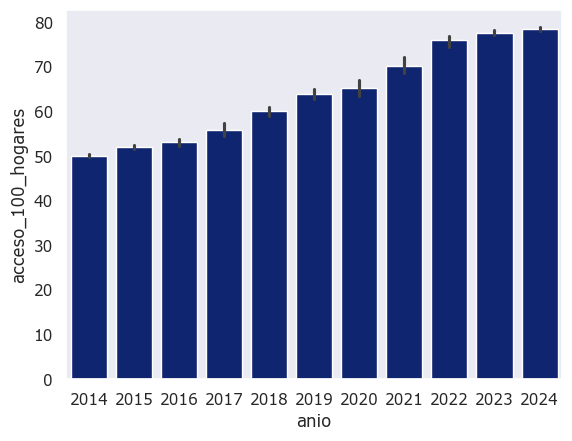

In [309]:

sns.barplot(x=df_penetracion_total.anio, y=df_penetracion_total.acceso_100_hogares)  # Crea y muestra el gráfico de barras
plt.show()

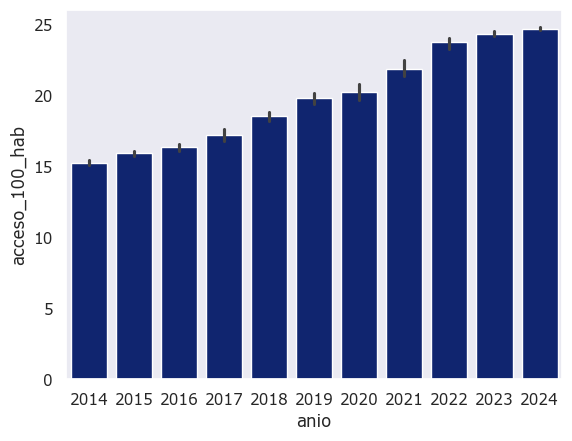

In [310]:

sns.barplot(x=df_penetracion_total.anio, y=df_penetracion_total.acceso_100_hab)  # Crea y muestra el gráfico de barras
plt.show()

Observemos por trimestre

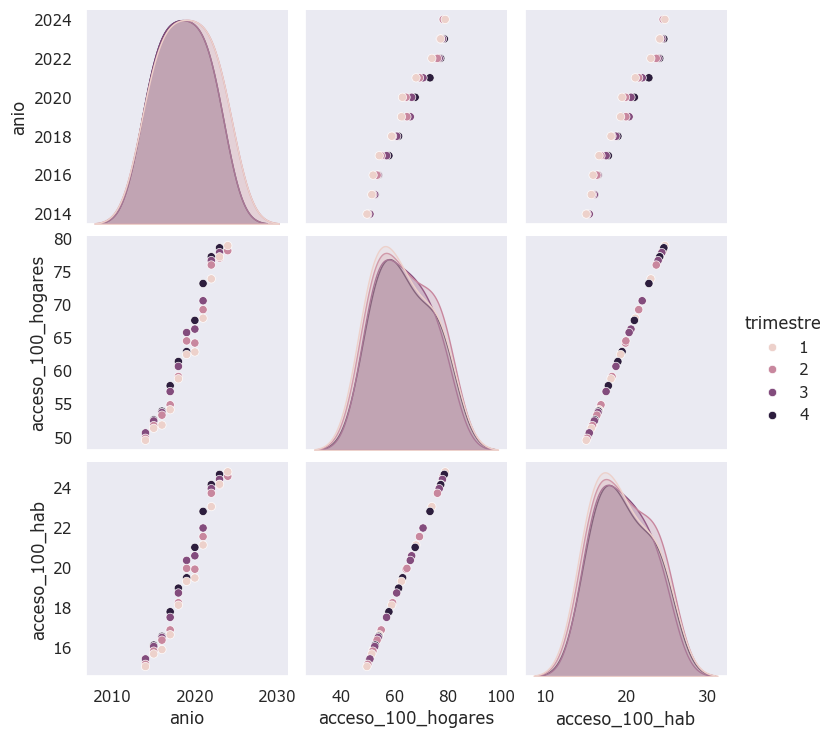

In [311]:
sns.pairplot(data=df_penetracion_total, hue="trimestre")

Al observar por trimestre, notamos que los primeros trimestres son un poco más bajos que los ultimos, observemos por diagrama de densidad

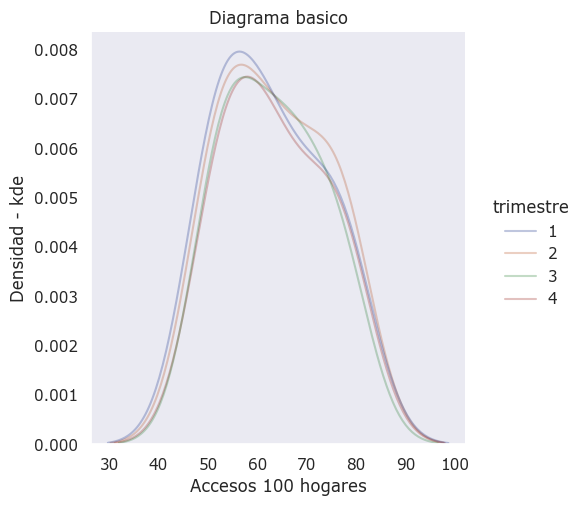

In [312]:
# Crea un gráfico de distribución utilizando Seaborn con la función displot
sns.displot(data=df_penetracion_total, x="acceso_100_hogares", hue='trimestre', kind='kde',legend=True, palette='dark',alpha=.25)
plt.title('Diagrama basico') #Título
plt.xlabel('Accesos 100 hogares') #Eje X
plt.ylabel('Densidad - kde') #Eje Y
plt.show()

Nuevamente observamos que los accesos son menos en los primeros trimestres que en los ultimos

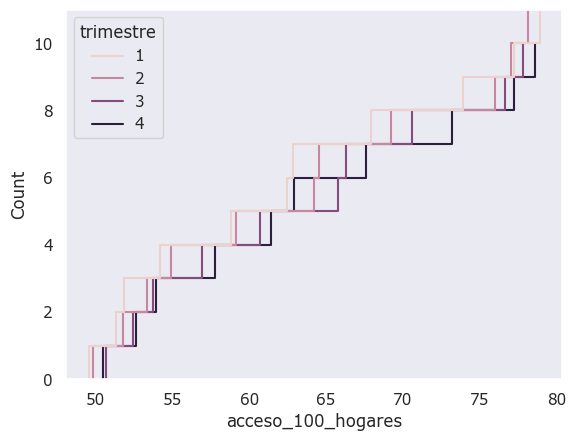

In [313]:
sns.ecdfplot(data=df_penetracion_total,x='acceso_100_hogares',hue='trimestre',stat='count') # Crea un gráfico de densidad de distribución acumulada utilizando Seaborn con la función ecdfplot
plt.show()

Graficando por trimestre, los accesos a hogares, por cada año, podemos observar que el primer trimestre es menor, al menos para accesos_100_hogares

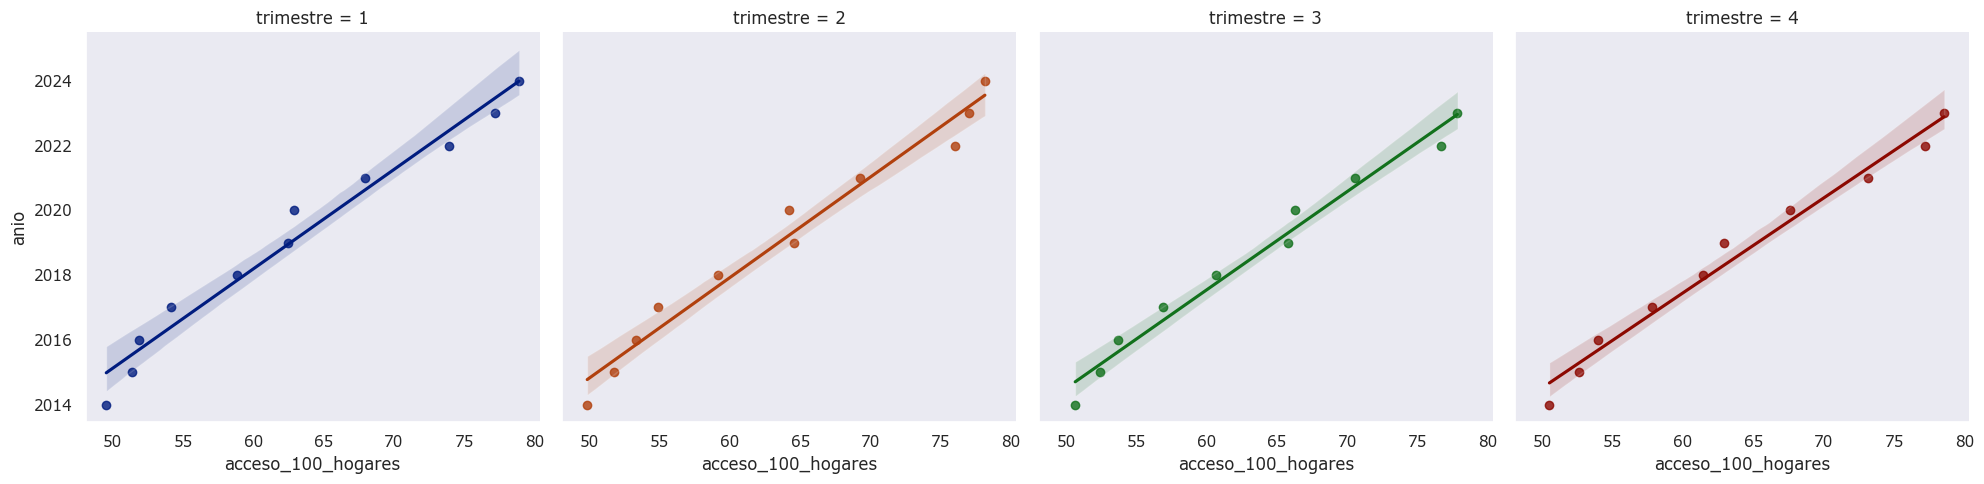

In [314]:
sns.lmplot(x='acceso_100_hogares', y='anio', data=df_penetracion_total, hue='trimestre', col='trimestre') # col me permite dividir el gráfico por la variable time

Observemos por habitantes

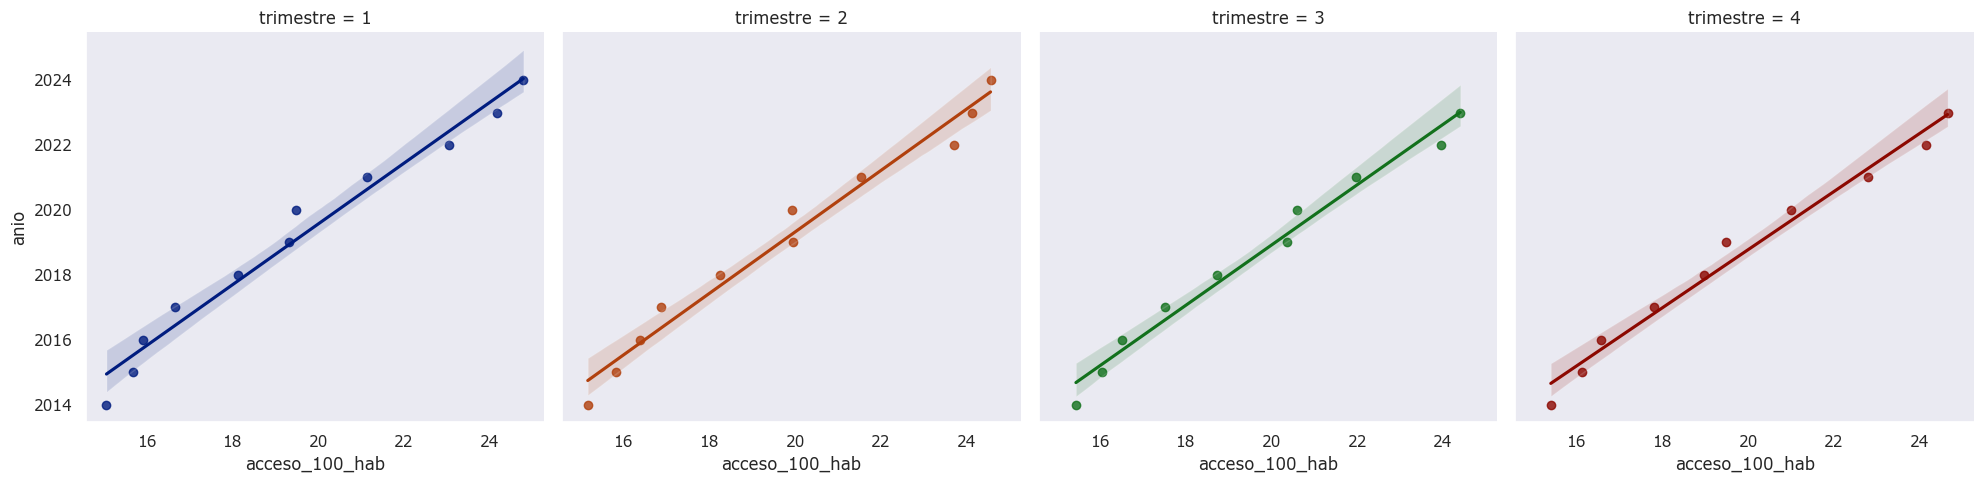

In [315]:
sns.lmplot(x='acceso_100_hab', y='anio', data=df_penetracion_total, hue='trimestre', col='trimestre') # col me permite dividir el gráfico por la variable time

Con lo anterior hemos corroborado que los primeros trimestres son menores que los ultimos, identifiquemos por que?, veamos si  hay una relacion con el tipo de tecnologia

In [316]:
try:    
    
    connection = pymysql.connect(
        host='localhost',
        database='telefonica',
        user='root',
        password='98020927'
    )
    cursor = connection.cursor()

    cursor.execute("select anio, trimestre, adsl, cablemodem, fibra_optica, wireless, otros, total from totales_acceso_tecnologia;")
    dictionary_result = [dict((cursor.description[i][0], value) for i, value in enumerate(row)) for row in cursor.fetchall()]        
    df_acceso_tec_total = pd.DataFrame.from_dict(dictionary_result)    
    connection.close()
except mysql.connector.Error as e:
    print('Error al conectar a MySQL:', e)

In [317]:
df_acceso_tec_total.describe()

,anio,trimestre,adsl,cablemodem,fibra_optica,wireless,otros,total
count,84.000000,84.000000,8.400000e+01,8.400000e+01,8.400000e+01,84.000000,84.000000,8.400000e+01
mean,2018.761905,2.452381,2.694844e+06,4.433906e+06,1.224694e+06,304293.214286,158186.071429,8.815923e+06
std,3.056177,1.123728,1.087734e+06,1.311808e+06,1.313153e+06,201974.579689,81865.838590,1.722716e+06
min,2014.000000,1.000000,7.334910e+05,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06
25%,2016.000000,1.000000,1.657615e+06,3.124855e+06,1.698980e+05,85370.000000,70049.000000,7.206950e+06
50%,2019.000000,2.000000,3.061623e+06,4.535507e+06,6.989465e+05,292223.000000,185221.000000,8.720658e+06
75%,2021.000000,3.000000,3.714764e+06,5.867504e+06,2.072236e+06,523107.000000,247016.000000,1.048979e+07
max,2024.000000,4.000000,3.803024e+06,6.073426e+06,4.169958e+06,598682.000000,265328.000000,1.163316e+07


In [318]:
df_acceso_tec_total.count()

anio            84
trimestre       84
adsl            84
cablemodem      84
fibra_optica    84
wireless        84
otros           84
total           84
dtype: int64

<Axes: >

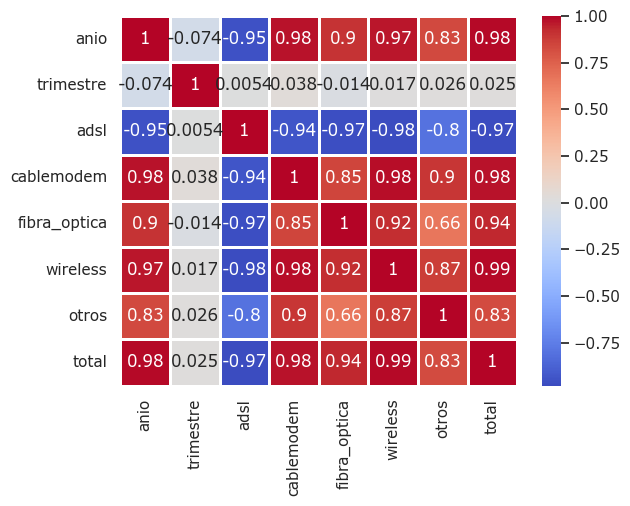

In [319]:
df_acceso_tec_total_cor=df_acceso_tec_total.corr()
sns.heatmap(df_acceso_tec_total_cor,annot=True,cmap='coolwarm',linewidths=1)

Observamos que la técnologia ADSL no esta creciendo como lo hace cablemode, fibra, wirless u otros. ADSL esta siendo lo opuesto. Veamos graficando por tecnologias


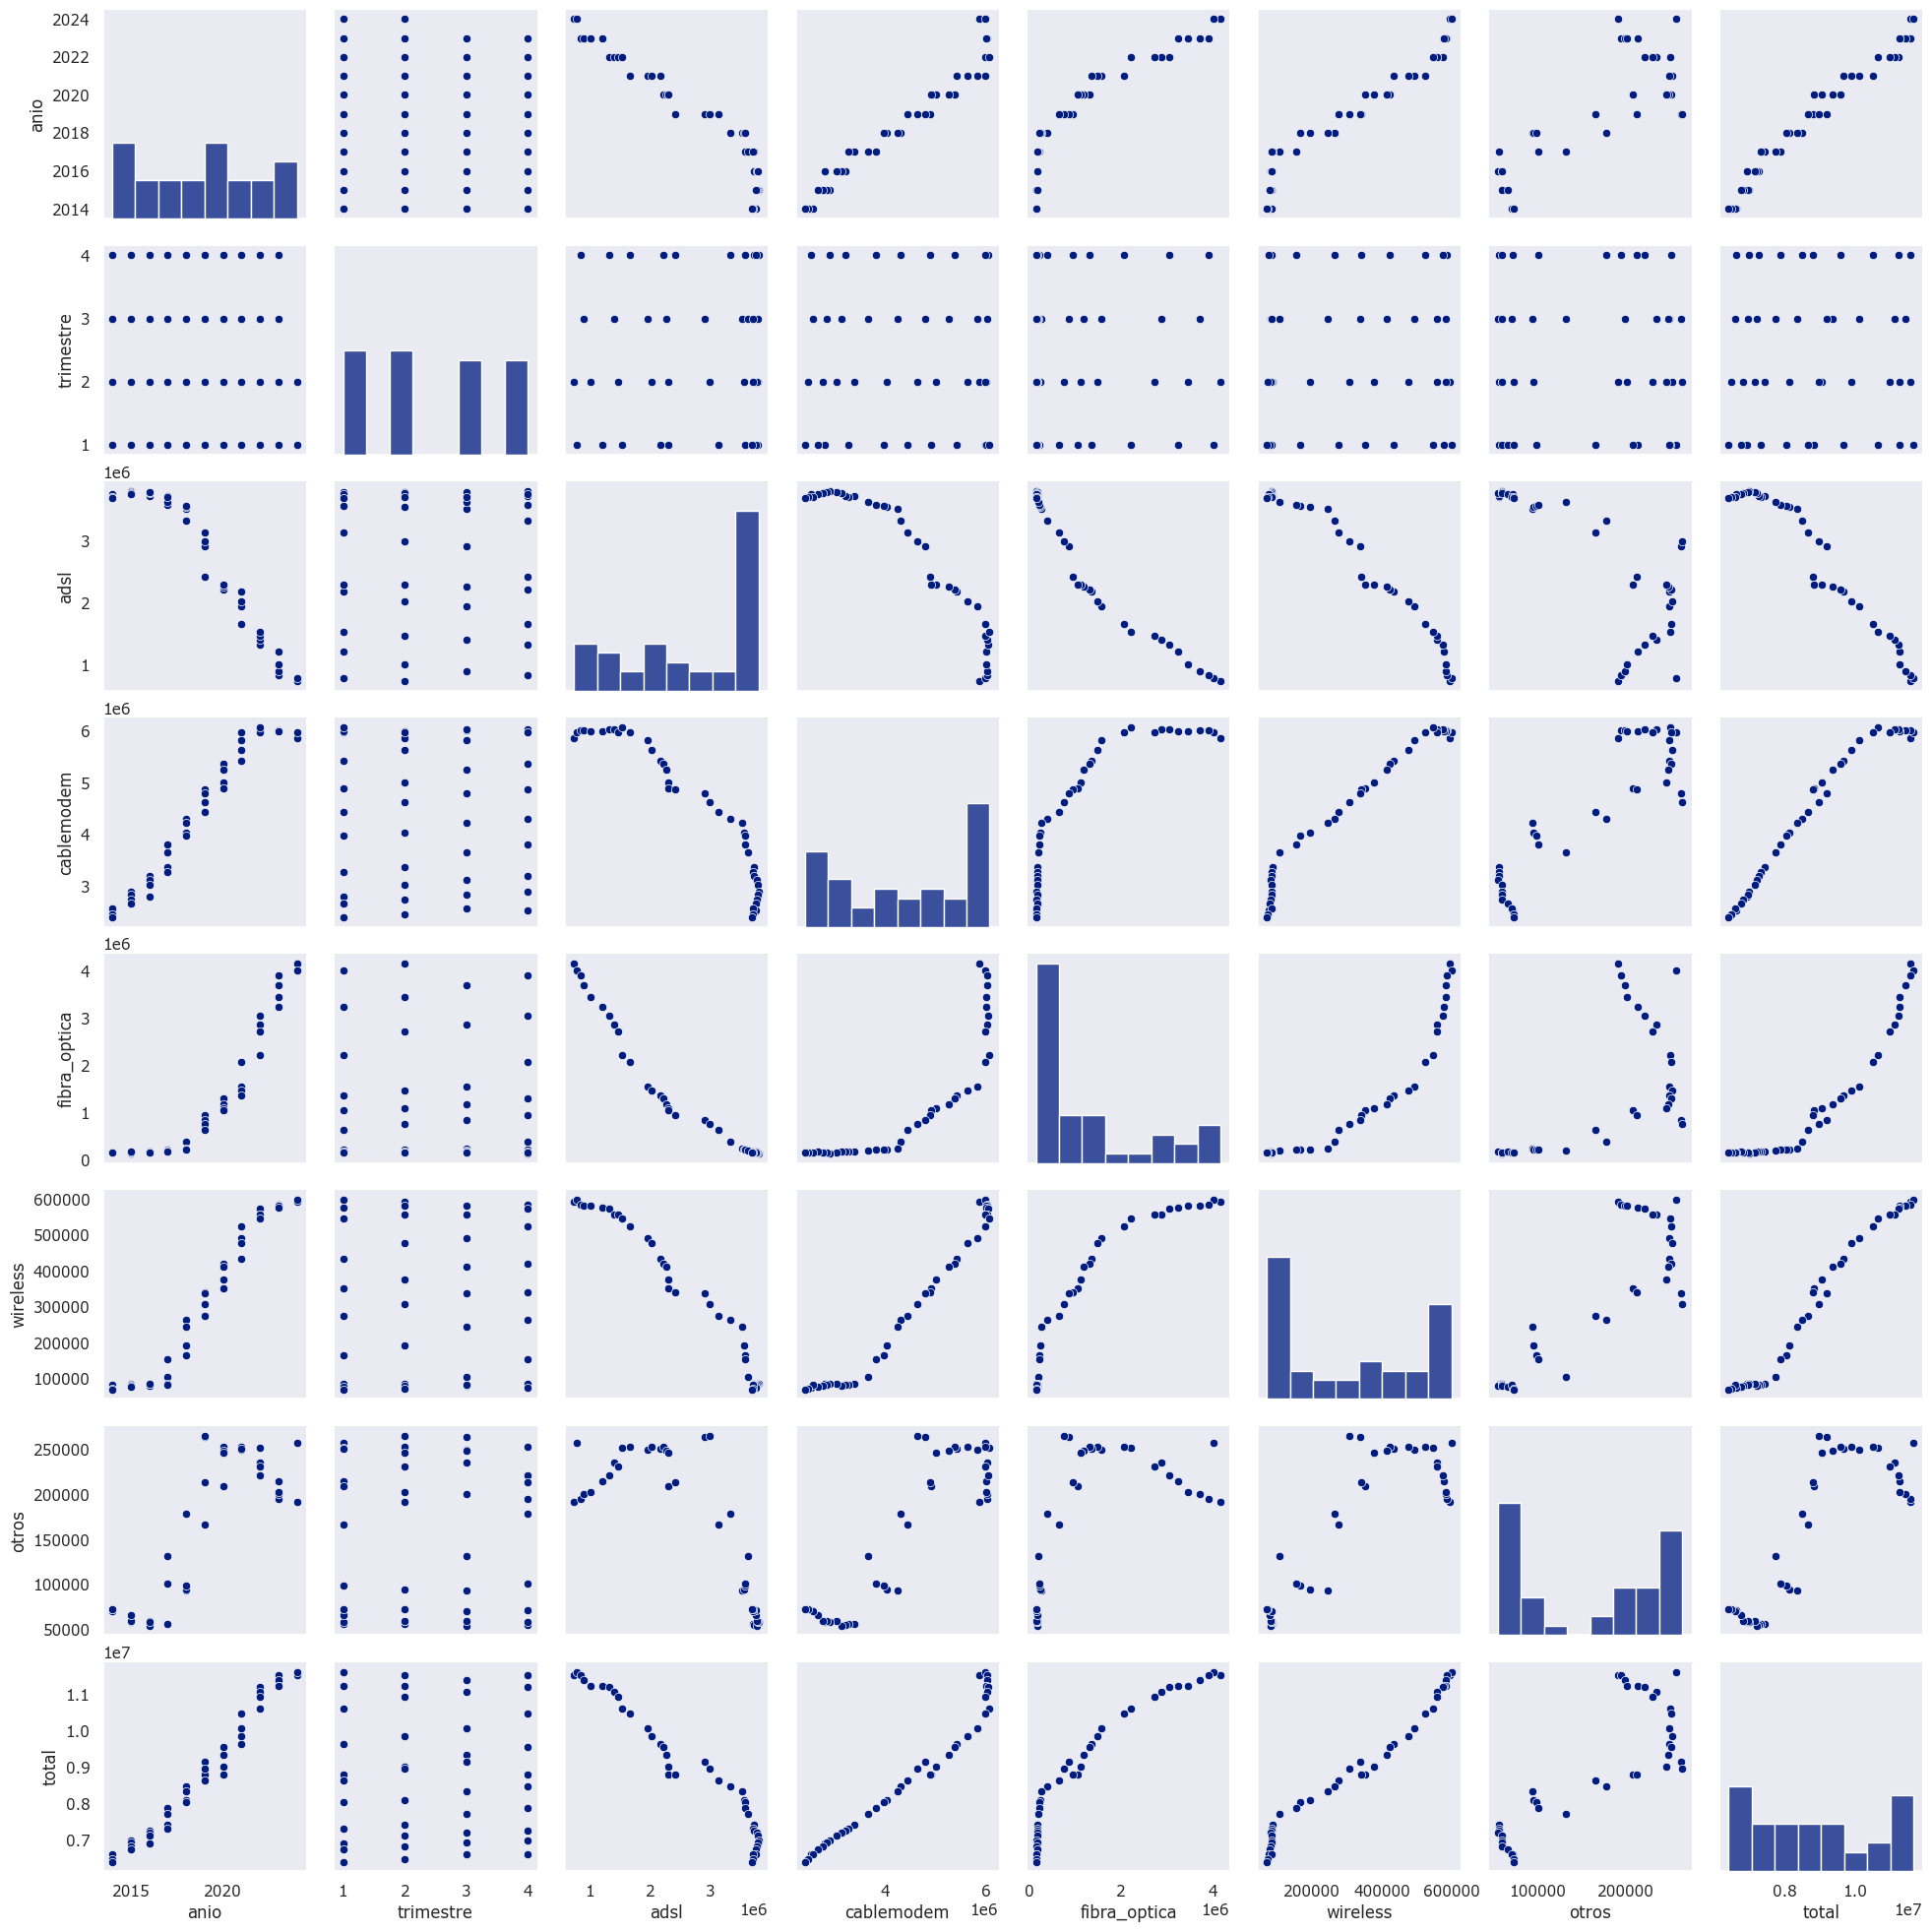

In [320]:
sns.pairplot(df_acceso_tec_total)

ADSL, definitivamente esta bajando, muy seguramente por que esta es una técnologia que ya esta siendo vieja. Cable modem iba subiendo, pero en los ultimos años esta bajando lentamente. Analicemos que provincias estan usando ADSL y Cable modem

In [321]:
try:    
    
    connection = pymysql.connect(
        host='localhost',
        database='telefonica',
        user='root',
        password='98020927'
    )
    cursor = connection.cursor()

    cursor.execute("select  anio, provincia, sum(adsl) sum_adsl, sum(cablemodem) sum_cable_modem, sum(fibra_optica) sum_fibra_optica, sum(wireless) sum_wireless from Acceso_Tecnologia where anio > 2019 and trimestre in(1,2) group by  anio, provincia order by 3 desc;")
    dictionary_result = [dict((cursor.description[i][0], value) for i, value in enumerate(row)) for row in cursor.fetchall()]        
    df_acceso_tec_provincia = pd.DataFrame.from_dict(dictionary_result)    
    connection.close()
except mysql.connector.Error as e:
    print('Error al conectar a MySQL:', e)

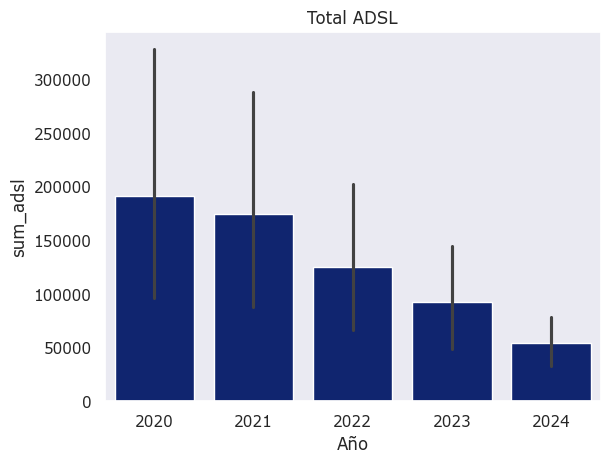

In [322]:

sns.set(style='dark',palette='dark',font="Verdana",font_scale=1) # Configura el estilo oscuro, paleta oscura, fuente Verdana y escala de fuente 1 en Seaborn
sns.barplot(df_acceso_tec_provincia, x="anio", y="sum_adsl")
plt.title('Total ADSL') # Agrega un título al gráfico
plt.xlabel('Año') # Agrega un título al eje x
plt.show()

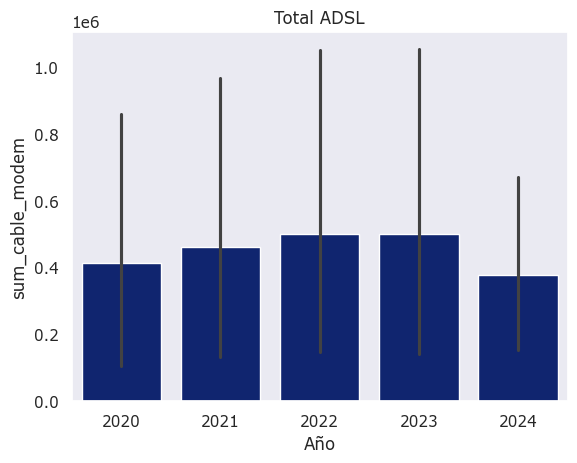

In [323]:
sns.set(style='dark',palette='dark',font="Verdana",font_scale=1) # Configura el estilo oscuro, paleta oscura, fuente Verdana y escala de fuente 1 en Seaborn
sns.barplot(df_acceso_tec_provincia, x="anio", y="sum_cable_modem")
plt.title('Total ADSL') # Agrega un título al gráfico
plt.xlabel('Año') # Agrega un título al eje x
plt.show()

Hemos identificado que adsl esta bajando, solo que para el 2024, tenemos los 2 primeros trimetres de cada año, lo mismo esta ocurriendo para cable modem, analicemos por provincias

Aqui podemos ver todas las provincias para ADSL

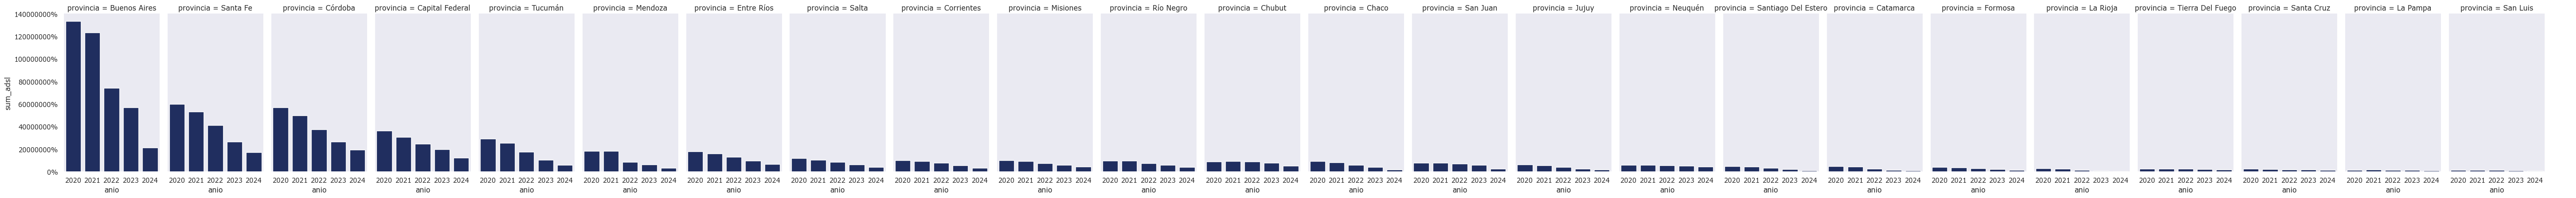

In [324]:
g = sns.catplot(x="anio", y="sum_adsl", col="provincia",
                 data=df_acceso_tec_provincia, saturation=.5,
                 kind="bar", errorbar=None, aspect=.5)

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Aqui podemos ver todas las provincias para Cablemodem

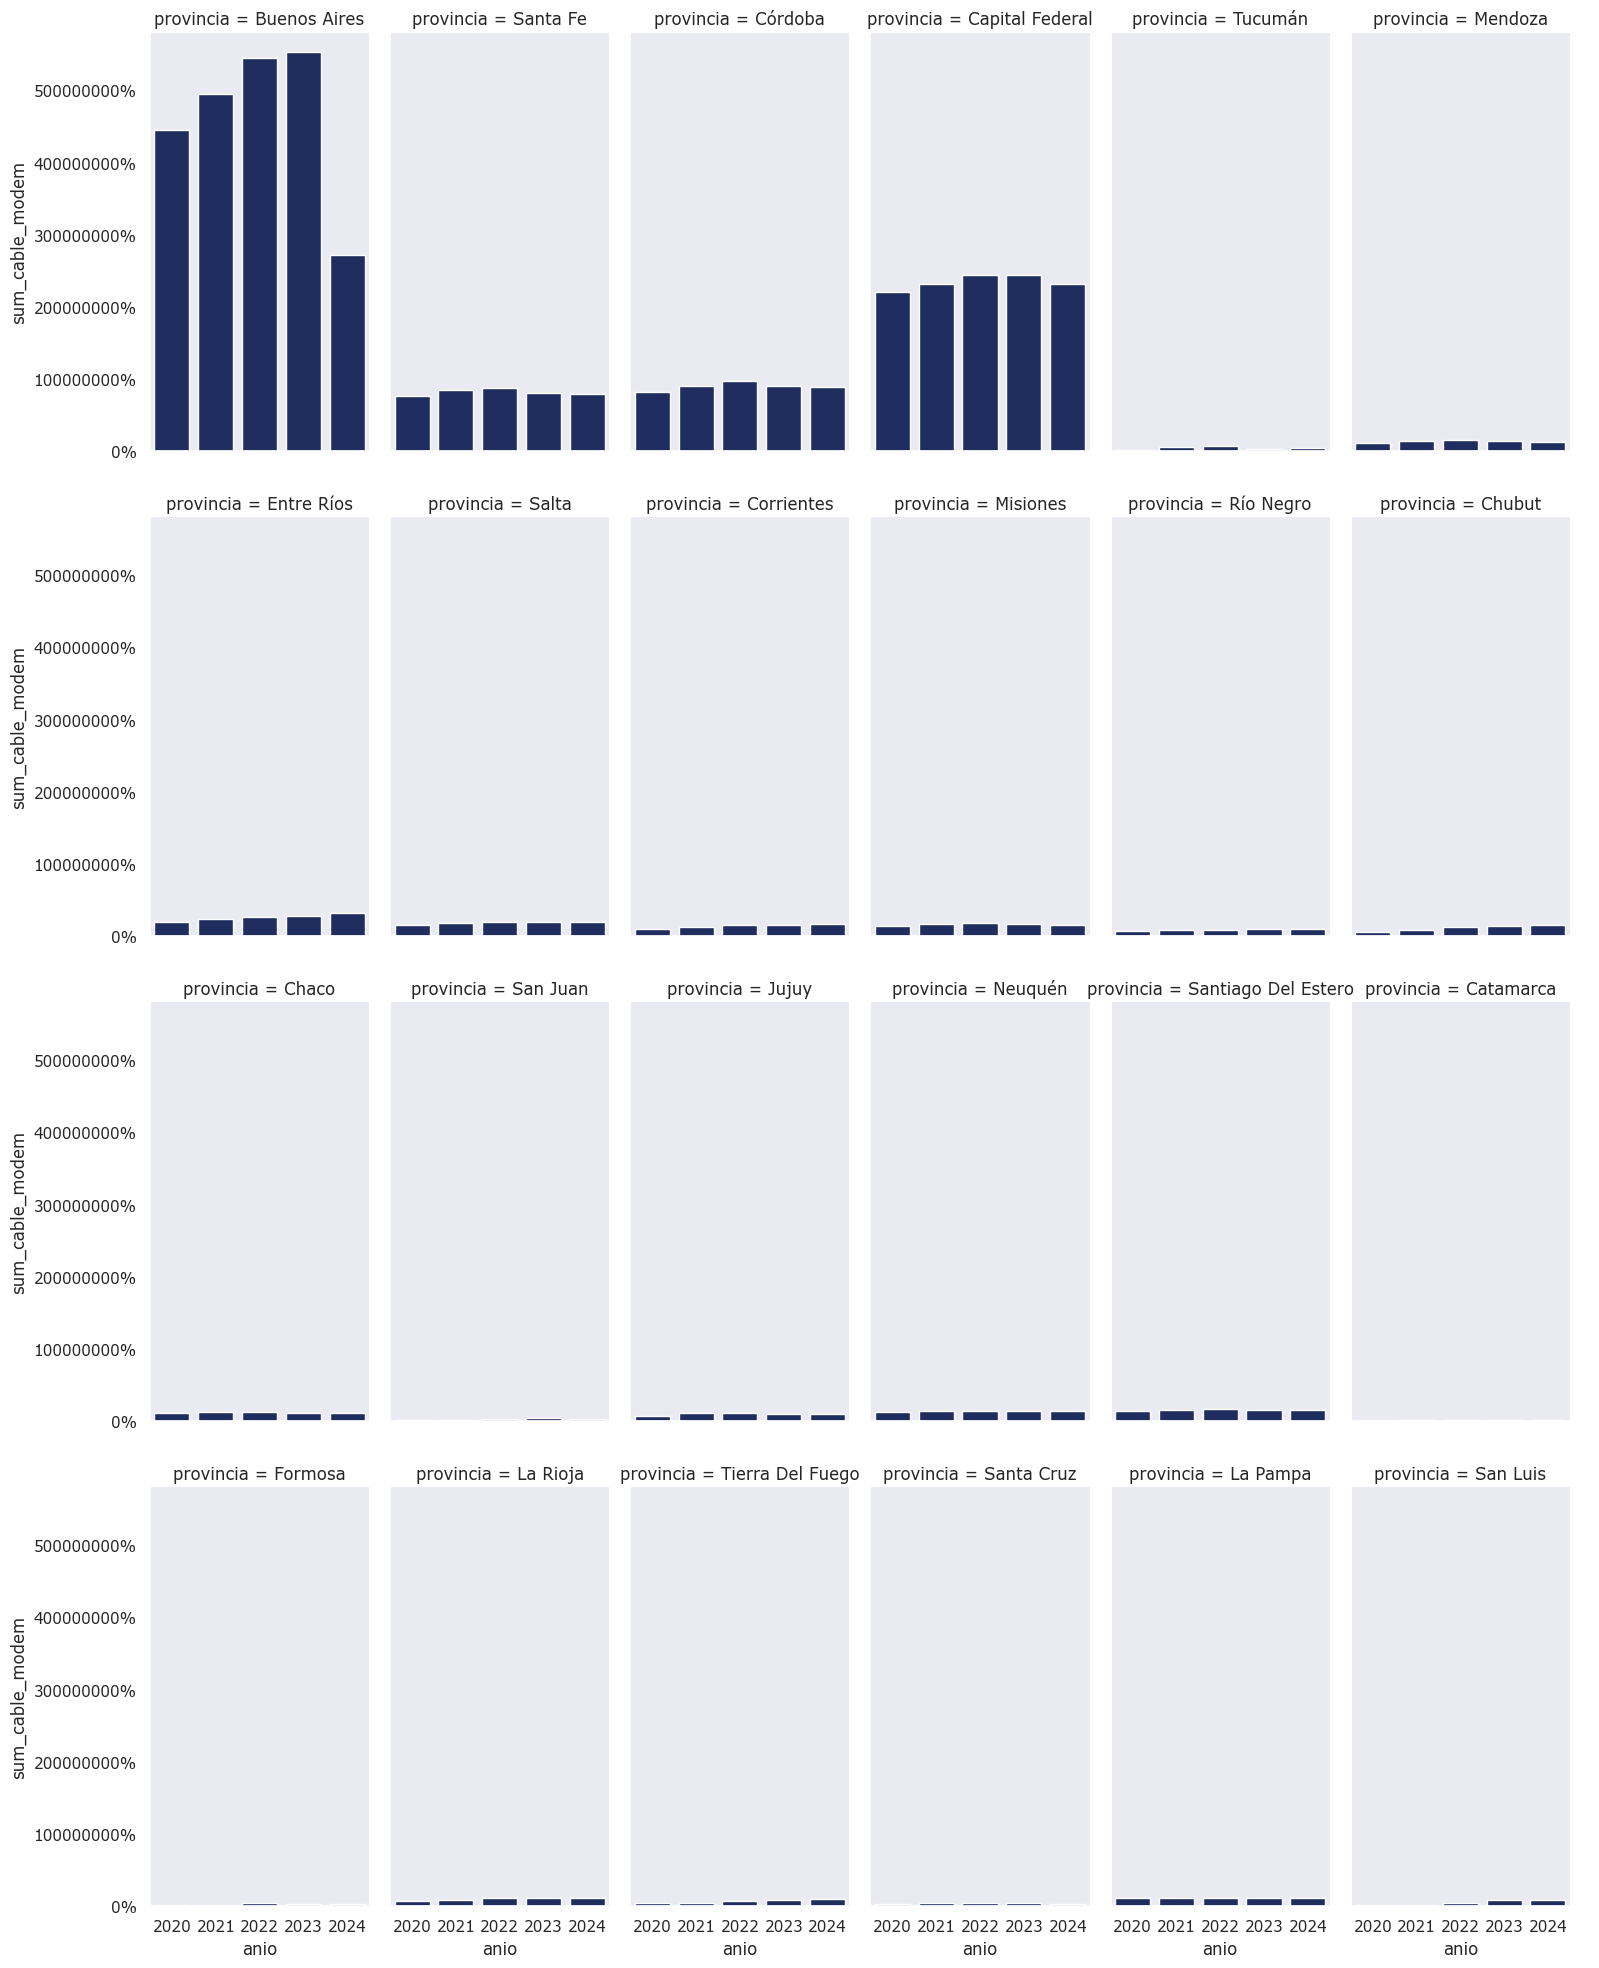

In [325]:
g = sns.catplot(x="anio", y="sum_cable_modem", col="provincia",
                 data=df_acceso_tec_provincia, saturation=.5,
                 kind="bar", errorbar=None, aspect=.5, col_wrap=6)

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Para ADSL a lo mejor seria normal que en todas va bajando, por que es una tecnología que es ya vieja.

Para Cablemodem,  ha bajado demasiado en Buenos Aires, mientras que en otros esta subiendo.

In [326]:
df_acceso_tec_provincia.head()

,anio,provincia,sum_adsl,sum_cable_modem,sum_fibra_optica,sum_wireless
0,2020,Buenos Aires,1334509.0,4454626.0,1443760.0,177179.0
1,2021,Buenos Aires,1232934.0,4955886.0,1675770.0,212352.0
2,2022,Buenos Aires,742697.0,5448478.0,2641164.0,252368.0
3,2020,Santa Fe,602340.0,765352.0,81821.0,60975.0
4,2023,Buenos Aires,570120.0,5527506.0,3197019.0,270863.0


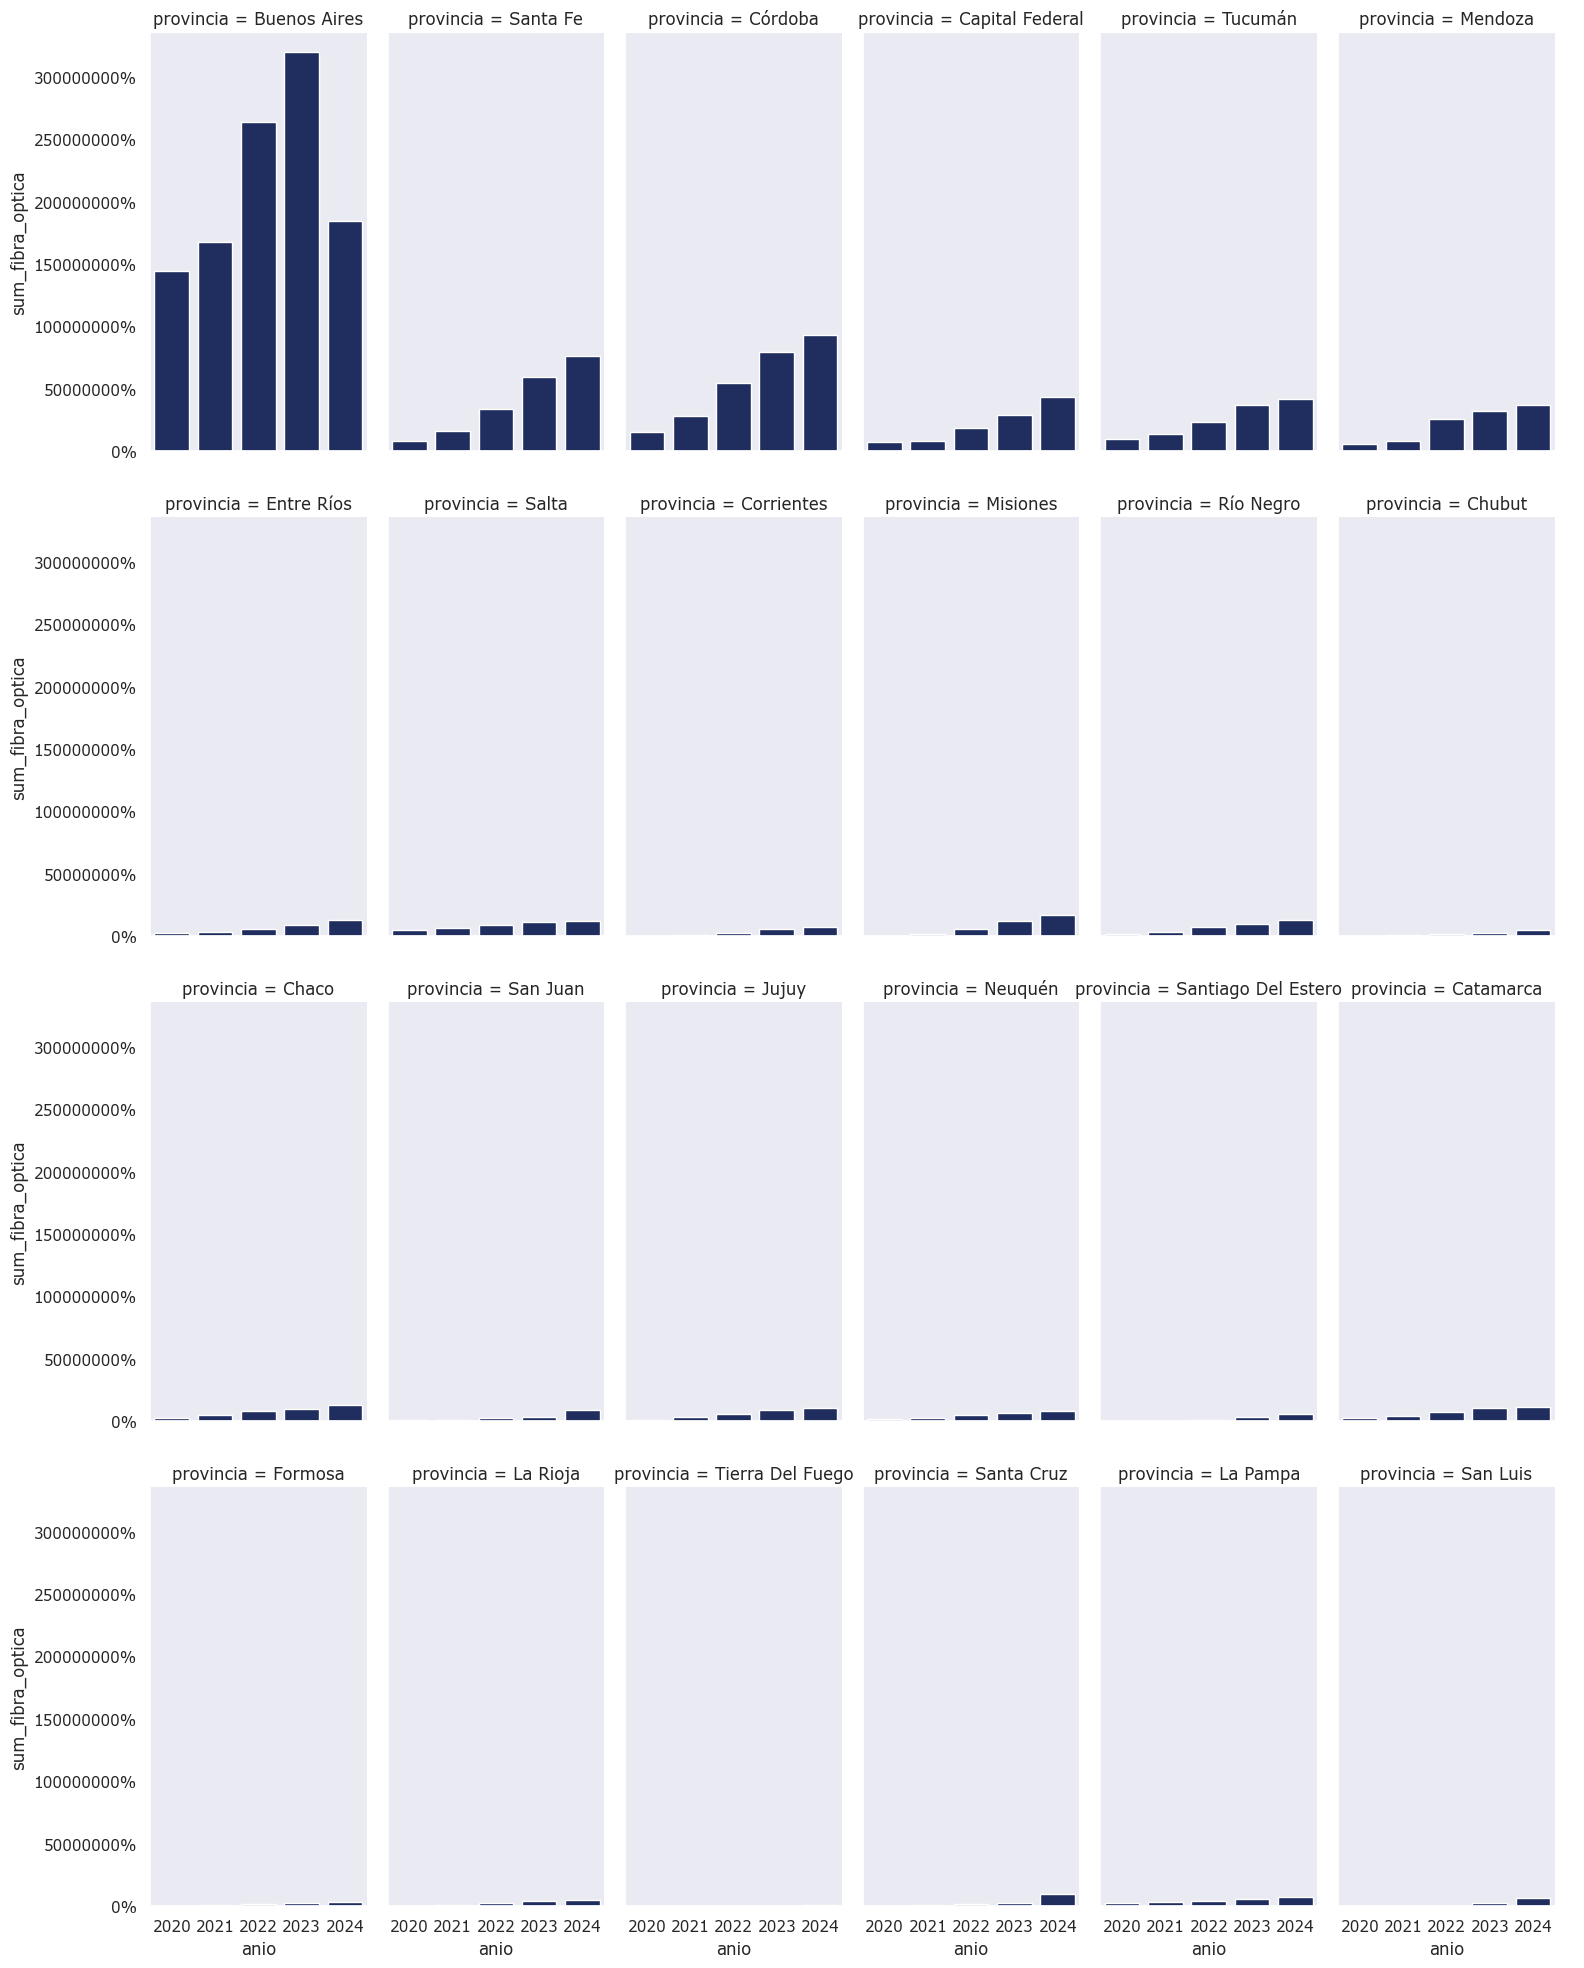

In [327]:
g = sns.catplot(x="anio", y="sum_fibra_optica", col="provincia",
                 data=df_acceso_tec_provincia, saturation=.5,
                 kind="bar", errorbar=None, aspect=.5, col_wrap=6)

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

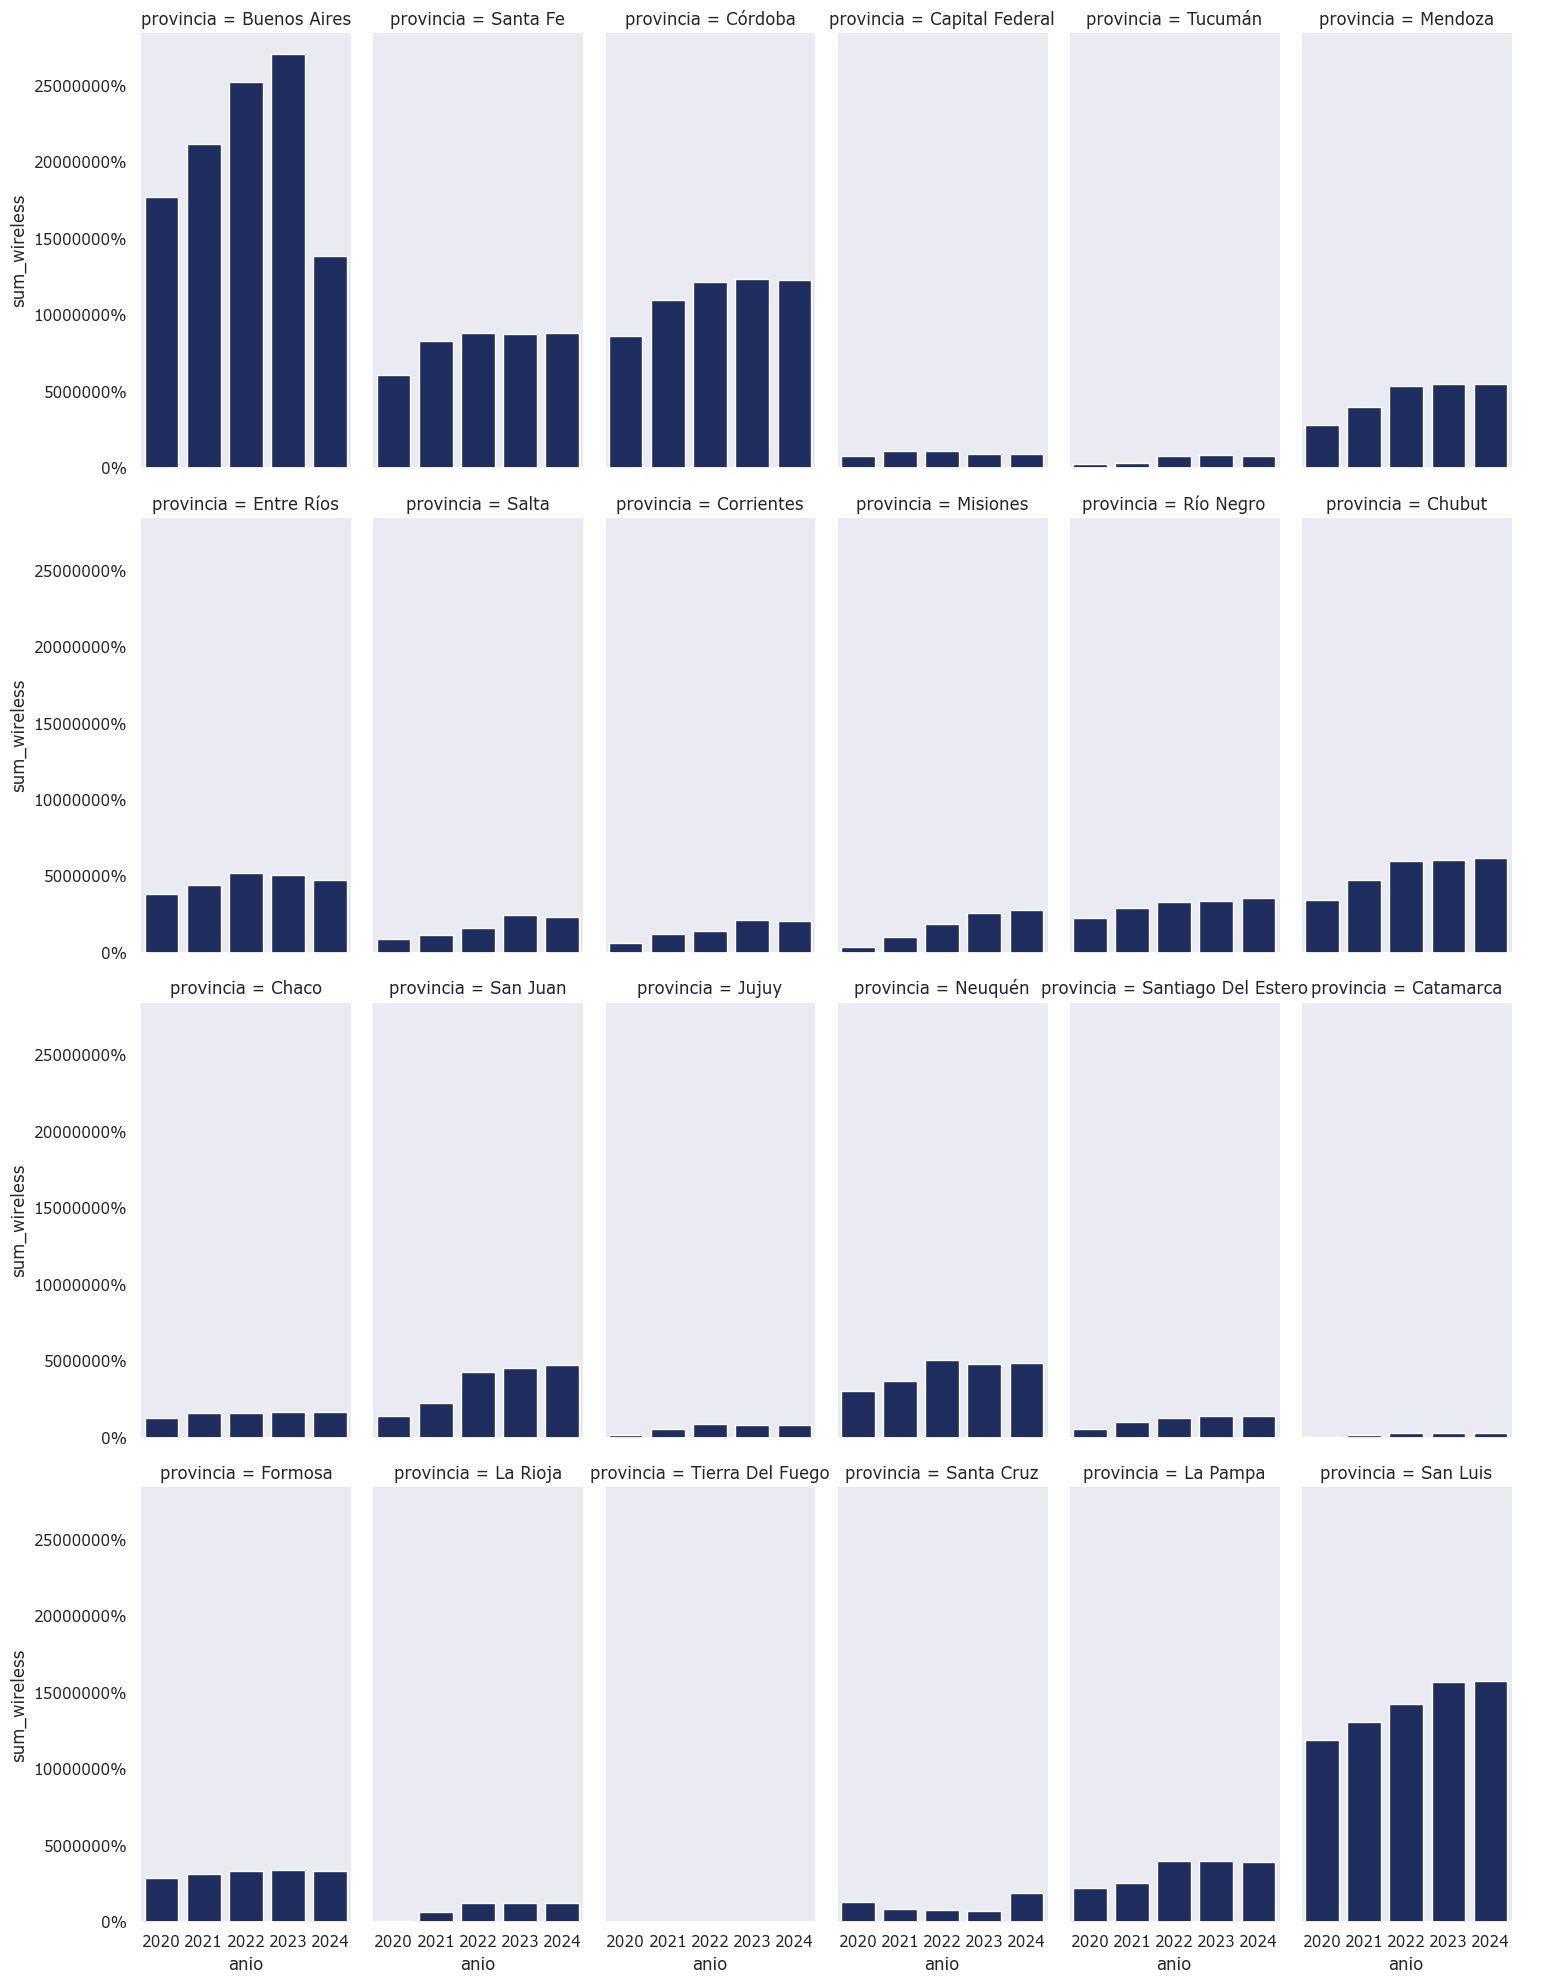

In [328]:
g = sns.catplot(x="anio", y="sum_wireless", col="provincia",
                 data=df_acceso_tec_provincia, saturation=.5,
                 kind="bar", errorbar=None, aspect=.5, col_wrap=6)

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Definitivamente estan pasando algo en buenos aires, no se esta teniendo el crecimiento acostumbrado

Revisemos las tecnologias

In [329]:
try:    
    
    connection = pymysql.connect(
        host='localhost',
        database='telefonica',
        user='root',
        password='98020927'
    )
    cursor = connection.cursor()

    cursor.execute("select provincia, tecnologia, sum(accesos) accesos from accesos_tecnologia_localidad where provincia in ( 'BUENOS AIRES', 'CABA', 'SAN LUIS', 'LA PAMPA') group by provincia, tecnologia;")
    dictionary_result = [dict((cursor.description[i][0], value) for i, value in enumerate(row)) for row in cursor.fetchall()]        
    df_acceso_tec_acc_provincia = pd.DataFrame.from_dict(dictionary_result)    
    connection.close()
except mysql.connector.Error as e:
    print('Error al conectar a MySQL:', e)

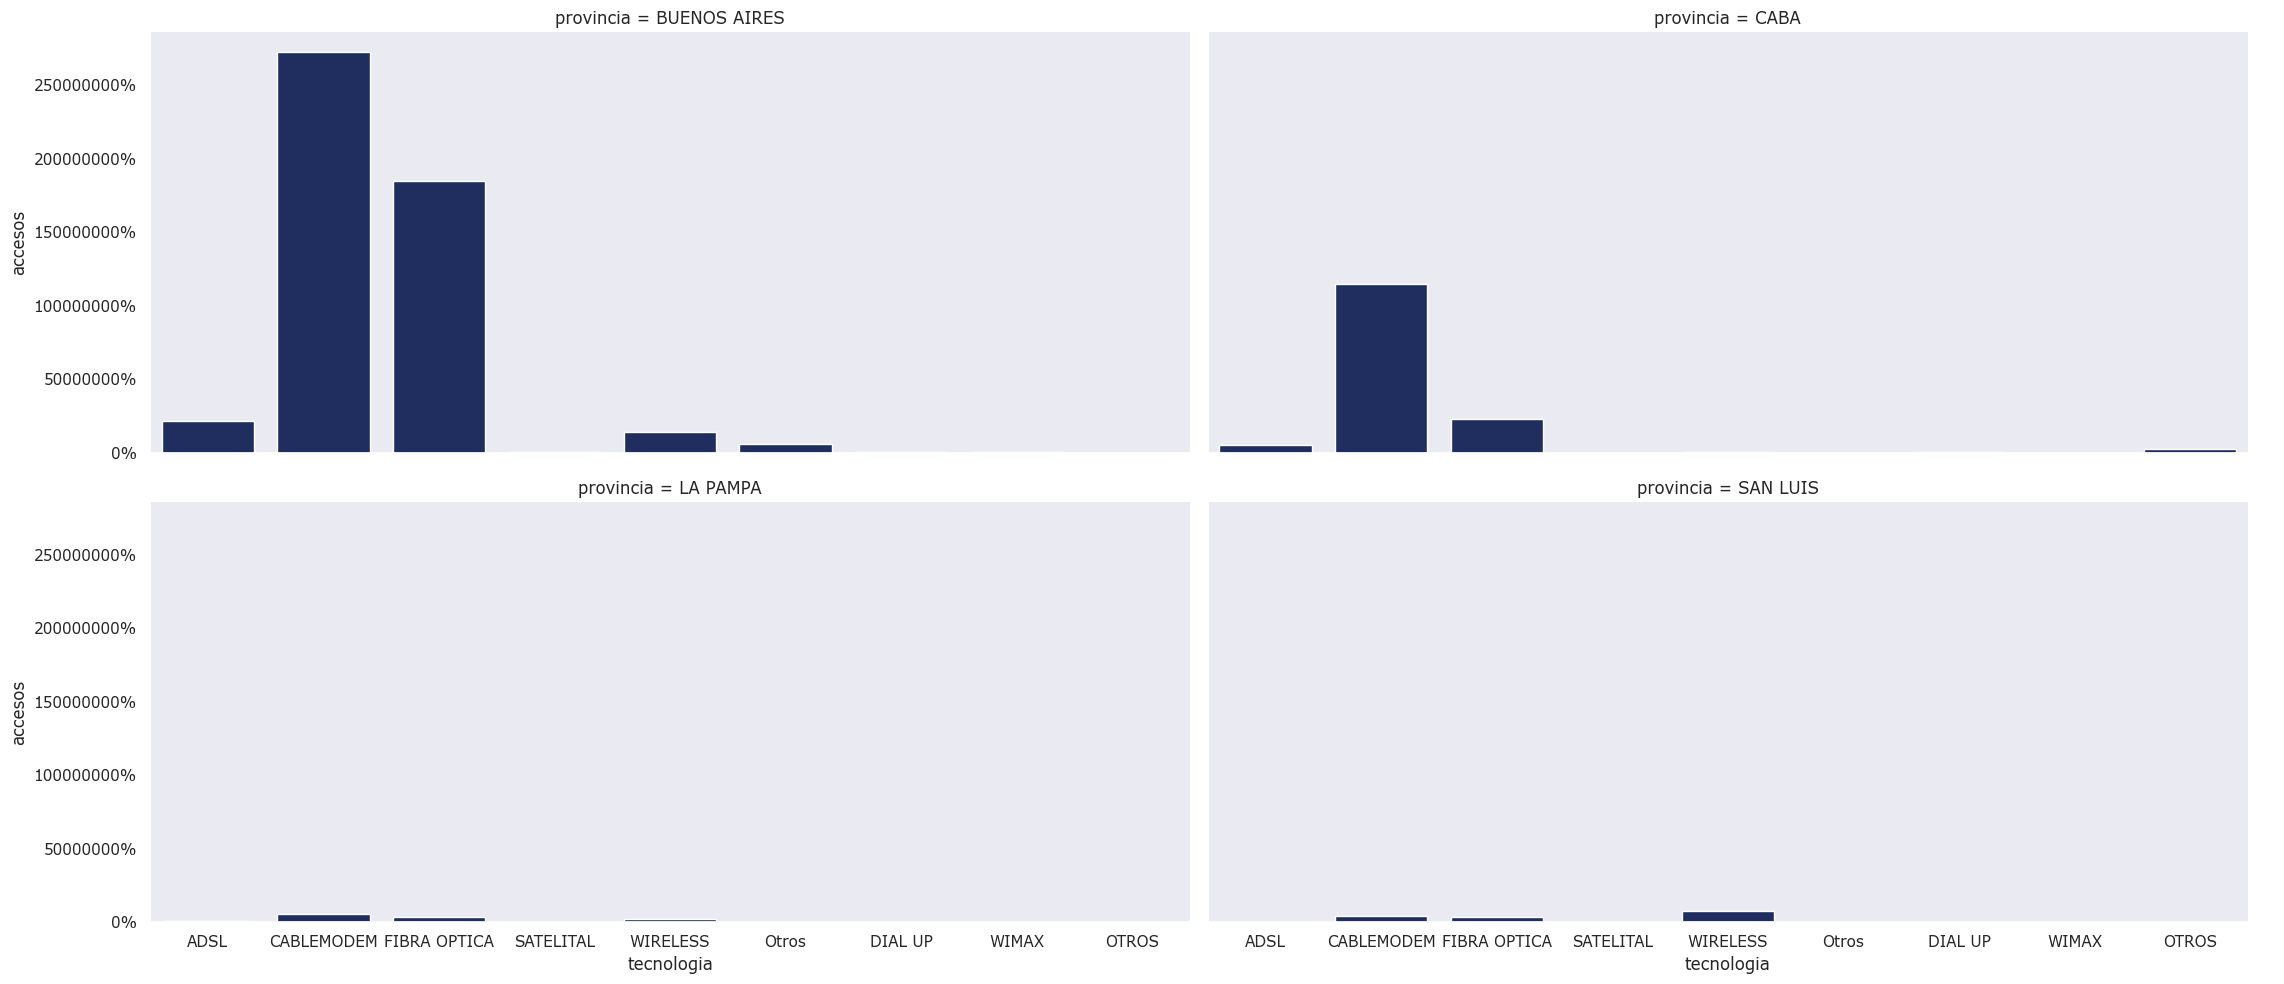

In [330]:
g = sns.catplot(x="tecnologia", y="accesos", col="provincia",
                 data=df_acceso_tec_acc_provincia, saturation=.5,
                 kind="bar", errorbar=None, aspect=2.2, col_wrap=2)

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Se ha gráficado los más altos (BA y CABA) vs los más bajos (La PAMPA, SAN LUIS). Podemos ver que en san Luis a pesar de ser más pequeño esta creciendo más que en BA y CABA al menos para wireless

In [331]:
try:    
    
    connection = pymysql.connect(
        host='localhost',
        database='telefonica',
        user='root',
        password='98020927'
    )
    cursor = connection.cursor()

    cursor.execute("select trim(provincia) provincia, avg(Media_Bajada_Mbps) velocidad from velocidad_provincia where anio >2019 and trimestre in (1,2) group by trim(provincia) order by 2 desc;")
    dictionary_result = [dict((cursor.description[i][0], value) for i, value in enumerate(row)) for row in cursor.fetchall()]        
    df_vel_provincia = pd.DataFrame.from_dict(dictionary_result)    
    connection.close()
except mysql.connector.Error as e:
    print('Error al conectar a MySQL:', e)

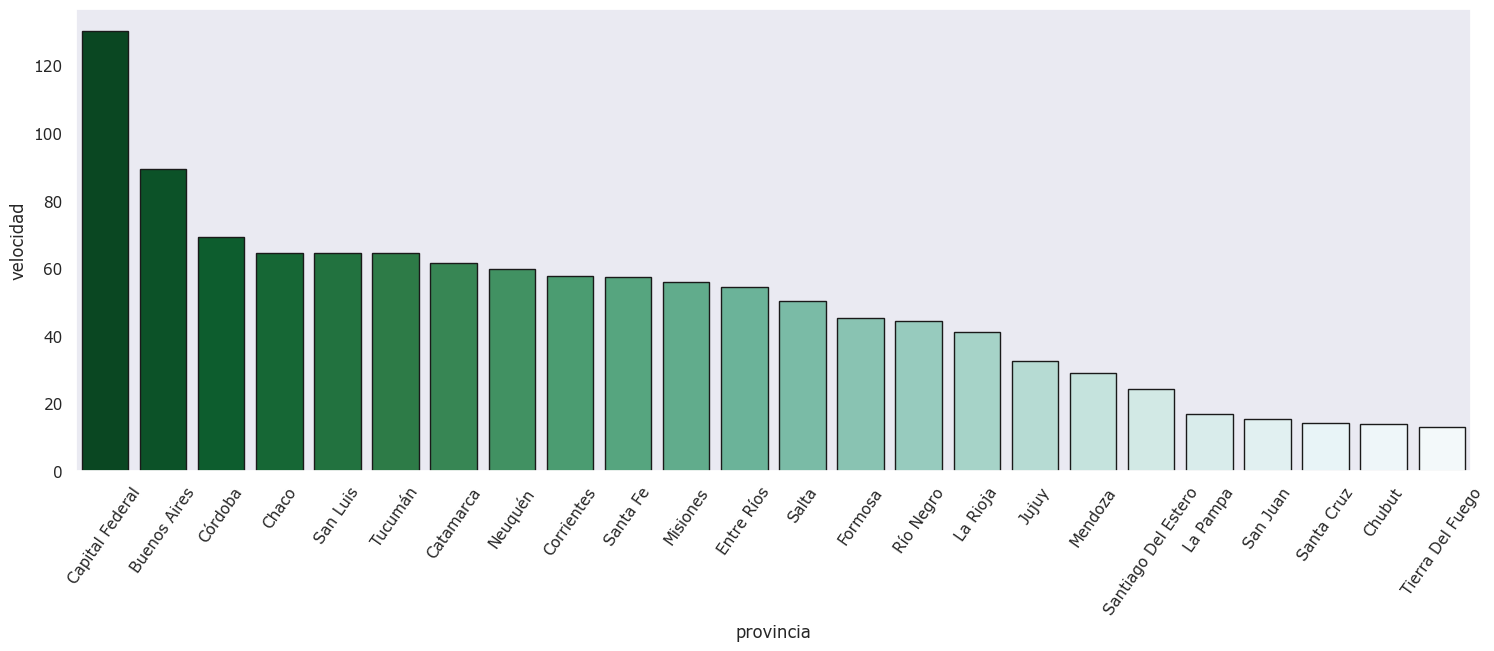

In [332]:
plt.figure(figsize=(18, 6))
ax = sns.barplot(data=df_vel_provincia, x=df_vel_provincia.provincia, y=df_vel_provincia.velocidad, hue='provincia', palette=sns.color_palette("BuGn_r", n_colors=len(df_vel_provincia)), ec='k', legend=False)

ax.tick_params(axis='x', labelrotation=55)
plt.show()


Podemos observar que la velocidad de CABA es mucho mayor que buenos aires, inclusive BA no esta tan lejos de San Luis. Puede ser que como la velocidad no esta siendo buena en BA esten yendo a la competencia

In [419]:
try:    
    
    connection = pymysql.connect(
        host='localhost',
        database='telefonica',
        user='root',
        password='98020927'
    )
    cursor = connection.cursor()

    cursor.execute("select provincia, type_access, sum(sumatoria) sumatoria from sumatoria_acceso_rango group by provincia, type_access;")
    dictionary_result = [dict((cursor.description[i][0], value) for i, value in enumerate(row)) for row in cursor.fetchall()]        
    df_vel_provincia = pd.DataFrame.from_dict(dictionary_result)    
    connection.close()
except mysql.connector.Error as e:
    print('Error al conectar a MySQL:', e)

Con lo de a continuación, podemos ver que hay más accesos de baja velocidad en BA que en CABA

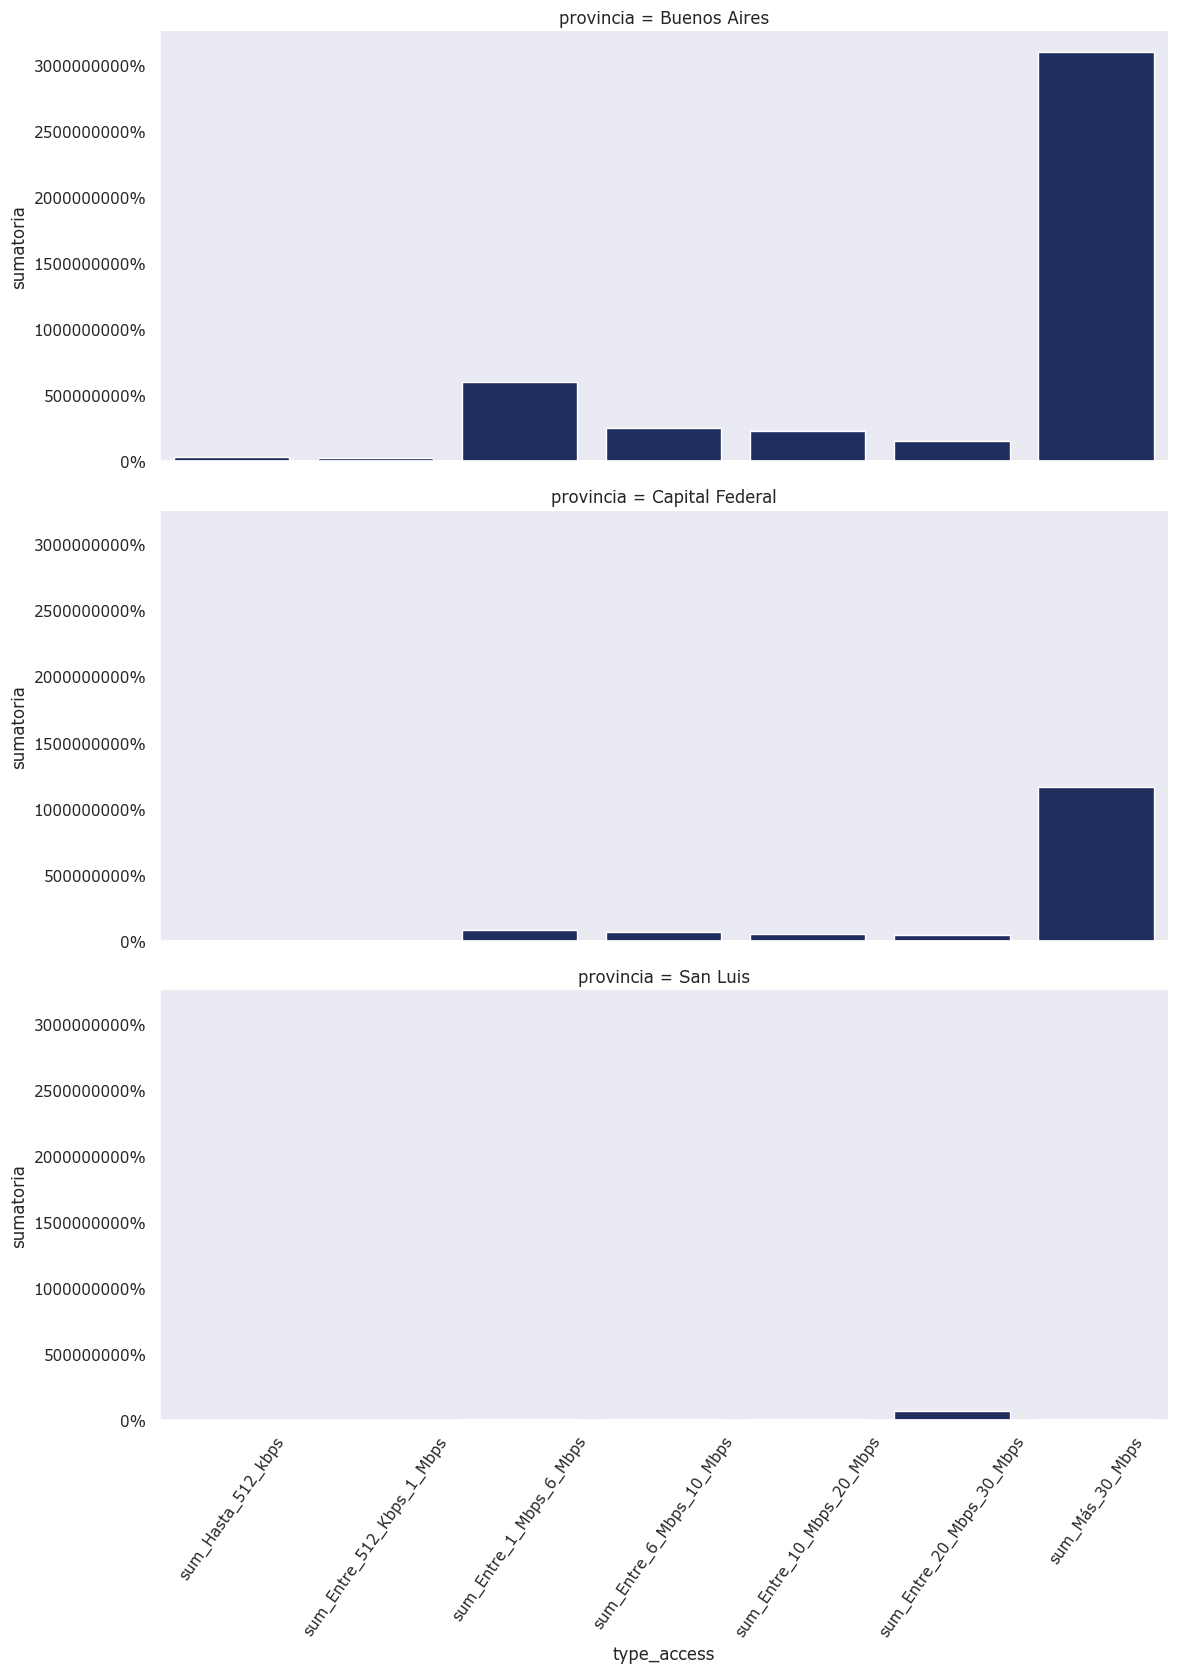

In [424]:
g = sns.catplot(x="type_access", y="sumatoria", col="provincia",
                 data=df_vel_provincia, saturation=.5,
                 kind="bar", errorbar=None, aspect=2.2, col_wrap=1)

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.tick_params(axis='x', labelrotation=55)
plt.show()
